In [48]:
##convertir en fichier CSV
import openpyxl

filename = 'TABLEAU_LIAISON_DIACHRONIE_DIAPHASIE_JLC_2019-10-18.xlsx'

## ouvrir le fichier xlsx 
xlsx = openpyxl.load_workbook(filename)

## ouvrir un fichier csv
sheet = xlsx.active

## extraire les données 
data = sheet.rows

## creation du fichier csv
newfile = open("data.csv", "w+", encoding="utf-8")

for row in data:
    l = list(row)
    for i in range(len(l)):
        if i == len(l) - 1:
            newfile.write(str(l[i].value))
        else:
            newfile.write(str(l[i].value) + ',')
    newfile.write('\n')

## fermer le fichier csv
newfile.close()


IndentationError: unexpected indent (<ipython-input-48-22dc03cbd92e>, line 73)

In [40]:
import codecs
import csv
import nltk
from nltk import FreqDist
from collections import OrderedDict
from operator import itemgetter    

fname = "data.csv"

f=open (fname, "r", encoding="utf-8" )

fieldnames=["Ordre","Référence","ESLO1/ESLO2","locuteur","time code","Temps en sec","Mot1","Mot2","posMOT1","lemmeMOT1","posMOT2","lemmeMOT2","Contexte gauche(Mot1)","Contexte droit (Mot2)","Contexte liaison","Liaison réalisée","Consonne de liaison produite" , "Commentaires","Liaison sans enchainement (LSE)"]

reader=csv.DictReader(f,fieldnames, delimiter=',') 

f_out=open ("TBN.csv", "w", encoding="utf-8")

writer= csv.DictWriter(f_out,fieldnames,  delimiter=';', extrasaction='ignore')



liste_liaison=["oui", "oui.figé","non","non.figé", "oui.remp"]
ref_dict={}
loc_dict={}
contexte_dict={}
contexteg_dict={}
contexte_eslo1={}
contexte_eslo2={}
duree1=0
duree2=0
duree=0
duree3=0
total_enrg=0
pos_mot1_dict={}
pos_mot2_dict={}
liste_pos_mo1=[]
liste_pos_mo2=[]
tup_pos=()
dict_tup={}
dict_cons={}
tup_posM1=()
tup_posM2=()
dict_tup_posM1={}
dict_tup_posM2={}
tup_posM1_M2=()
dict_tup_posM1_M2={}


## parcourir les lignes du fichier csv
for line in reader:
####Pré-traitement des données
    # supprimer les colonnes
    del line["Commentaires"] 
    del line["Liaison sans enchainement (LSE)"]
    
    #print (line)
    ##sélectionner les lignes contenants les liaisons dans la liste
    for w in liste_liaison:
        if w in line ["Liaison réalisée"]:
                writer.writerow(line)
                #print(line)
                
####Traitement des données   
###Question 1 : calcule du nombre de référence et du nombre du locuteur
                if line ["Référence"] in ref_dict.keys():
                   ref_dict[line ["Référence"]]+=1
                else:
                    ref_dict[line ["Référence"]]=1
#print (ref_dict)

                if line ["locuteur"] in loc_dict.keys():
                           loc_dict[line ["locuteur"]]+=1
                else:
                           loc_dict[line ["locuteur"]]=1
#print (loc_dict)

###Question 2 : calcule de nombre de contexte de liaisons
            
                if line ["Contexte liaison"] in contexteg_dict.keys():
                      contexteg_dict[line ["Contexte liaison"]]+=1
                else:
                      contexteg_dict[line ["Contexte liaison"]]=1
#print (contexteg_dict)
   
                if line ["ESLO1/ESLO2"] =="ESLO1" and line ["Contexte liaison"] in contexte_eslo1.keys():
                        contexte_eslo1[line ["Contexte liaison"]]+=1
                else:
                        contexte_eslo1[line ["Contexte liaison"]]=1
#print(contexte_eslo1)
                if line ["ESLO1/ESLO2"] =="ESLO2" and line ["Contexte liaison"] in contexte_eslo2.keys():
                         contexte_eslo2[line ["Contexte liaison"]]+=1
                else:
                         contexte_eslo2[line ["Contexte liaison"]]=1
#print(contexte_eslo2)

###Question 3 : calcule de la durée des enregistrements
          

                         for i in line["Temps en sec"]:
                            if line ["ESLO1/ESLO2"] =="ESLO1":
                                duree1=float(line["Temps en sec"]+i)                      
                                if(duree1>=60):
                                            minute1=int(duree1//60) #calcule le nombre de minutes par division entière
                                            seconde1=int(duree1%60) #calcule le nombre de secondes (le reste de la division entière)
                            if line ["ESLO1/ESLO2"] =="ESLO2":
                                duree2=float(line["Temps en sec"]+i)                      
                                if(duree2>=60):
                                        minute2=int(duree2//60) 
                                        seconde2=int(duree2%60) 
                                        if(minute2>=60):
                                            heure=minute2//60 #calcule le nombre d'heures
                                            minute2=minute2%60 #retourne le reste en minutes
                            
                            total_enrg=duree1+duree2 #la durée totale d'enregistrement 
                            if(total_enrg>=60):
                                        minuteT=int(total_enrg//60) 
                                        secondeT=int(total_enrg%60) 
                                        if(minuteT>=60):
                                            heureT=minuteT//60 #calcule le nombre d'heures
                                            minuteT=minuteT%60
#print("Durée d'enregitrement total est:",heureT,"heure",minuteT,"minute",secondeT,"seconde")
#print ("la durée d'enregistrement ESLO1 en seconde:", duree1)
#print("la durée d'enregistrement ESLO1:",minute1,"min",seconde1,"sec")
#print("la durée d'enregistrement ESLO2:",minute2,"min",seconde2,"sec"

###Questions 4 : Définition des POS du Mot1 et du Mot2 les plus fréquents 

               if line ["posMOT1"] in pos_mot1_dict.keys():
                    pos_mot1_dict[line ["posMOT1"]]+=1
        else:
                    pos_mot1_dict[line ["posMOT1"]]=1
        for k,v in pos_mot1_dict.items():
            #print(k, v)
            if v >=200:
                liste_pos_mo1.append((k,v))
#print(liste_pos_mo1)
#fposMot1 = FreqDist(pos_mot1_dict)
#fposMot1.plot(10) 
        
        if line ["posMOT2"] in pos_mot2_dict.keys():
                pos_mot2_dict[line ["posMOT2"]]+=1
        else:
                pos_mot2_dict[line ["posMOT2"]]=1
        for k,v in pos_mot2_dict.items():
        print(k, v)
            if v >=200:
                liste_pos_mo2.append((k,v))

#print(liste_pos_mo2)
#fposMot2 = FreqDist(pos_mot2_dict)
#fposMot2 .plot(10, cumulative=False)          
#print (pos_mot2_dict)

###Question 5 : Trouver les occurrences POS Mot1-POS Mot2

                if line["posMOT1"] not in tup_pos:
                    tup_pos=line ["posMOT1"]+"\t"+ line ["posMOT2"]
                    #print(tup_pos)   
                    if tup_pos in dict_tup:
                        dict_tup[tup_pos]+=1
                    else:
                        dict_tup[tup_pos]=1 
print(OrderedDict(sorted(dict_tup.items(), key = itemgetter(1), reverse = True)))
fpos = FreqDist(dict_tup)
fpos.plot(10, cumulative=False) 

###Qestions 6 : Définition de l'ordre de fréquence des consonnes de liaison
    
                if line["Consonne de liaison produite"] in dict_cons.keys():
                    dict_cons[line["Consonne de liaison produite"]]+=1
                else:
                    dict_cons[line["Consonne de liaison produite"]]=1
print(OrderedDict(sorted(dict_cons.items(), key = itemgetter(1), reverse = True)))

###Question 7 : calcule du taux de liaison réalisée : POS Mot1, POS Mot2 et POS Mot1-POS Mot2

                if line["posMOT1"] not in tup_posM1:
                    tup_posM1=line ["posMOT1"]+"\t"+ line ["Liaison réalisée"]   
                    if tup_posM1 in dict_tup_posM1:
                        dict_tup_posM1[tup_posM1]+=1
                    else:
                        dict_tup_posM1[tup_posM1]=1 
#print(OrderedDict(sorted(dict_tup_posM1.items(), key = itemgetter(1), reverse = True)))
#f_liaison = FreqDist(dict_tup_posM1)
#f_liaison.plot(10, cumulative=False) 

                if line["posMOT2"] not in tup_posM2:
                        tup_posM2=line ["posMOT2"]+"\t"+ line ["Liaison réalisée"]   
                        if tup_posM2 in dict_tup_posM2:
                                dict_tup_posM2[tup_posM2]+=1
                        else:
                                dict_tup_posM2[tup_posM2]=1 
#print(OrderedDict(sorted(dict_tup_posM2.items(), key = itemgetter(1), reverse = True)))

                if line ["Liaison réalisée"] not in tup_pos:
                        tup_pos=tup_pos+"\t"+ line ["Liaison réalisée"]
                        #print (tup_pos)
                        if tup_pos in dict_tup:
                            dict_tup[tup_pos]+=1
                        else:
                             dict_tup[tup_pos]=1 
print(OrderedDict(sorted(dict_tup.items(), key = itemgetter(1), reverse = True)))
#fposMots = FreqDist(dict_tup)
#fposMots.plot(5, cumulative=False) 
            

f.close()
f_out.close()
   

    
    
   



la durée d'enregistrement ESLO1 en seconde: 622.0
la durée d'enregistrement ESLO1: 10 min 22 sec


In [18]:
import codecs
import csv
import nltk
from nltk import FreqDist
from collections import OrderedDict
from operator import itemgetter    

fname = "data.csv"

f=open (fname, "r", encoding="utf-8" )

fieldnames=["Ordre","Référence","ESLO1/ESLO2","locuteur","time code","Temps en sec","Mot1","Mot2","posMOT1","lemmeMOT1","posMOT2","lemmeMOT2","Contexte gauche(Mot1)","Contexte droit (Mot2)","Contexte liaison","Liaison réalisée","Consonne de liaison produite" , "Commentaires","Liaison sans enchainement (LSE)"]

reader=csv.DictReader(f,fieldnames, delimiter=',') 

f_out=open ("TBN.csv", "w", encoding="utf-8")

writer= csv.DictWriter(f_out,fieldnames,  delimiter=';', extrasaction='ignore')



liste_liaison=["oui", "oui.figé","non","non.figé", "oui.remp"]
ref_dict={}
loc_dict={}
contexte_dict={}
contexteg_dict={}
contexte_eslo1={}
contexte_eslo2={}



## parcourir les lignes du fichier csv
for line in reader:
####Pré-traitement des données
    # supprimer les colonnes
    del line["Commentaires"] 
    del line["Liaison sans enchainement (LSE)"]
    
    #print (line)
    ##sélectionner les lignes contenants les liaisons dans la liste
    for w in liste_liaison:
        if w in line ["Liaison réalisée"]:
                writer.writerow(line)
                #print(line)
                
 
###Question 1 : calcule du nombre de référence et du nombre du locuteur
                if line ["Référence"] in ref_dict.keys():
                    ref_dict[line ["Référence"]]+=1
                else:
                    ref_dict[line ["Référence"]]=1
#print (ref_dict)

                if line ["locuteur"] in loc_dict.keys():
                           loc_dict[line ["locuteur"]]+=1
                else:
                           loc_dict[line ["locuteur"]]=1
#print (loc_dict)

###Question 2 : calcule de nombre de contexte de liaisons
            
                if line ["Contexte liaison"] in contexteg_dict.keys():
                      contexteg_dict[line ["Contexte liaison"]]+=1
                else:
                      contexteg_dict[line ["Contexte liaison"]]=1
#print (contexteg_dict)
   
                if line ["ESLO1/ESLO2"] =="ESLO1" and line ["Contexte liaison"] in contexte_eslo1.keys():
                        contexte_eslo1[line ["Contexte liaison"]]+=1
                else:
                        contexte_eslo1[line ["Contexte liaison"]]=1
#print(contexte_eslo1)
                if line ["ESLO1/ESLO2"] =="ESLO2" and line ["Contexte liaison"] in contexte_eslo2.keys():
                         contexte_eslo2[line ["Contexte liaison"]]+=1
                else:
                         contexte_eslo2[line ["Contexte liaison"]]=1
#print(contexte_eslo2)


f.close()
f_out.close()

In [47]:
###Question 3 : calcule de la durée des enregistrements
import codecs
import csv
import nltk
from nltk import FreqDist
from collections import OrderedDict
from operator import itemgetter    

fname = "data.csv"

f=open (fname, "r", encoding="utf-8" )
#fieldnames=["Ordre","Order_bis","Référence","Diachronie/Diaphasie","ESLO1/ESLO2","locuteur","enquêteur/enquêté","time code","Temps en sec","Mot1","Mot2","posMOT1","lemmeMOT1","posMOT2","lemmeMOT2","Contexte gauche(Mot1)","Contexte droit (Mot2)","Contexte liaison","Liaison réalisée","Consonne de liaison produite" , "Commentaires","Liaison sans enchainement (LSE)"]

fieldnames=["Ordre","Référence","ESLO1/ESLO2","locuteur","time code","Temps en sec","Mot1","Mot2","posMOT1","lemmeMOT1","posMOT2","lemmeMOT2","Contexte gauche(Mot1)","Contexte droit (Mot2)","Contexte liaison","Liaison réalisée","Consonne de liaison produite" , "Commentaires","Liaison sans enchainement (LSE)"]
#fieldnames=[1"Ordre",2"Référence",3"ESLO1/ESLO2",4"locuteur",5"time code",6"Temps en sec",7"Mot1",8"Mot2",9"posMOT1",10"lemmeMOT1",11"posMOT2",12"lemmeMOT2",13"Contexte gauche(Mot1)",14"Contexte droit (Mot2)",15"Contexte liaison",16"Liaison réalisée",15"Consonne de liaison produite"]

reader=csv.DictReader(f,fieldnames, delimiter=',') 

f_out=open ("TBN.csv", "w", encoding="utf-8")

writer= csv.DictWriter(f_out,fieldnames,  delimiter=';', extrasaction='ignore')



liste_liaison=["oui", "oui.figé","non","non.figé", "oui.remp"]

duree1=0
duree2=0
duree=0
duree3=0
total_enrg=0



## parcourir les lignes du fichier csv
for line in reader:
####Pré-traitement des données
    # supprimer les colonnes
    del line["Commentaires"] 
    del line["Liaison sans enchainement (LSE)"]
    
    #print (line)
    ##sélectionner les lignes contenants les liaisons dans la liste
    for w in liste_liaison:
        if w in line ["Liaison réalisée"]:
                writer.writerow(line)
                #print(line)
                for i in line["Temps en sec"]:
                            if line ["ESLO1/ESLO2"] =="ESLO1":
                                duree1=float(line["Temps en sec"]+i)                      
                                if(duree1>=60):
                                            minute1=int(duree1//60) #calcule le nombre de minutes par division entière
                                            seconde1=int(duree1%60) #calcule le nombre de secondes (le reste de la division entière)
                            if line ["ESLO1/ESLO2"] =="ESLO2":
                                duree2=float(line["Temps en sec"]+i)                      
                                if(duree2>=60):
                                        minute2=int(duree2//60) 
                                        seconde2=int(duree2%60) 
                                        if(minute2>=60):
                                            heure=minute2//60 #calcule le nombre d'heures
                                            minute2=minute2%60 #retourne le reste en minutes
                            
                            total_enrg=duree1+duree2 #la durée totale d'enregistrement 
                            if(total_enrg>=60):
                                        minuteT=int(total_enrg//60) 
                                        secondeT=int(total_enrg%60) 
                                        if(minuteT>=60):
                                            heureT=minuteT//60 #calcule le nombre d'heures
                                            minuteT=minuteT%60  
print("Durée d'enregitrement total est:",heureT,"heure",minuteT,"minute",secondeT,"seconde")
#print("la durée d'enregistrement ESLO1 en seconde:", duree1)
#print("la durée d'enregistrement ESLO1:",minute1,"min",seconde1,"sec")
#print("la durée d'enregistrement ESLO2:",minute2,"min",seconde2,"sec"
                    

f.close()
f_out.close()
   

    
    

Durée d'enregitrement total est: 9 heure 2 minute 57 seconde


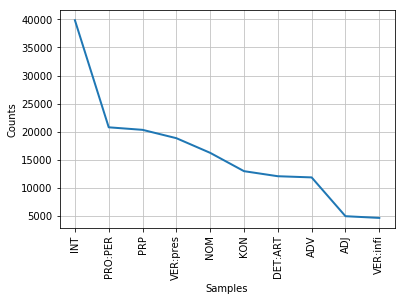

In [12]:
###Questions 4 : Définition des POS du Mot1 et du Mot2 les plus fréquents 

import codecs
import csv
import nltk
from nltk import FreqDist
from collections import OrderedDict
from operator import itemgetter    

fname = "data.csv"

f=open (fname, "r", encoding="utf-8" )

fieldnames=["Ordre","Référence","ESLO1/ESLO2","locuteur","time code","Temps en sec","Mot1","Mot2","posMOT1","lemmeMOT1","posMOT2","lemmeMOT2","Contexte gauche(Mot1)","Contexte droit (Mot2)","Contexte liaison","Liaison réalisée","Consonne de liaison produite" , "Commentaires","Liaison sans enchainement (LSE)"]

reader=csv.DictReader(f,fieldnames, delimiter=',') 

f_out=open ("TBN.csv", "w", encoding="utf-8")

writer= csv.DictWriter(f_out,fieldnames,  delimiter=';', extrasaction='ignore')

liste_liaison=["oui", "oui.figé","non","non.figé", "oui.remp"]

pos_mot1_dict={}
pos_mot2_dict={}
liste_pos_mo1=[]
liste_pos_mo2=[]
tup_pos=()
dict_tup={}
dict_cons={}
tup_posM1=()
tup_posM2=()
dict_tup_posM1={}
dict_tup_posM2={}





for line in reader:
    #print(line)
    ####Pré-traitement des données
    # supprimer les colonnes
    del line["Commentaires"] 
    del line["Liaison sans enchainement (LSE)"]
    
    #print (line)
    ##sélectionner les lignes contenants les liaisons dans la liste
    for w in liste_liaison:
        if w in line ["Liaison réalisée"]:
                writer.writerow(line)
                #print(line)
                

                if line ["posMOT1"] in pos_mot1_dict.keys():
                            pos_mot1_dict[line ["posMOT1"]]+=1
                else:
                            pos_mot1_dict[line ["posMOT1"]]=1
                for k,v in pos_mot1_dict.items():
                    #print(k, v)
                    if v >=200:
                        liste_pos_mo1.append((k,v))
#print(liste_pos_mo1)
#fposMot1 = FreqDist(pos_mot1_dict)
#fposMot1.plot(10) 
        
                #if line ["posMOT2"] in pos_mot2_dict.keys():
                        #pos_mot2_dict[line ["posMOT2"]]+=1
                #else:
                       # pos_mot2_dict[line ["posMOT2"]]=1
                #for k,v in pos_mot2_dict.items():
                #print(k, v)
                    #if v >=200:
                        #liste_pos_mo2.append((k,v))

#print(liste_pos_mo2)
#fposMot2 = FreqDist(pos_mot2_dict)
#fposMot2 .plot(10, cumulative=False)          
#print (pos_mot2_dict)
  

f.close()
f_out.close()
     
        

In [20]:
###Question 5 : Définition des occurrences POS Mot1-POS Mot2
import codecs
import csv
import nltk
from nltk import FreqDist
from collections import OrderedDict
from operator import itemgetter    

fname = "data.csv"

f=open (fname, "r", encoding="utf-8" )

fieldnames=["Ordre","Référence","ESLO1/ESLO2","locuteur","time code","Temps en sec","Mot1","Mot2","posMOT1","lemmeMOT1","posMOT2","lemmeMOT2","Contexte gauche(Mot1)","Contexte droit (Mot2)","Contexte liaison","Liaison réalisée","Consonne de liaison produite" , "Commentaires","Liaison sans enchainement (LSE)"]

reader=csv.DictReader(f,fieldnames, delimiter=',') 

f_out=open ("TBN.csv", "w", encoding="utf-8")

writer= csv.DictWriter(f_out,fieldnames,  delimiter=';', extrasaction='ignore')

liste_liaison=["oui", "oui.figé","non","non.figé", "oui.remp"]

tup_pos=()
dict_tup={}
oui_pos=()




for line in reader:
    #print(line)
    ####Pré-traitement des données
    # supprimer les colonnes
    del line["Commentaires"] 
    del line["Liaison sans enchainement (LSE)"]
    
    #print (line)
    ##sélectionner les lignes contenants les liaisons dans la liste
    for w in liste_liaison:
        if w in line ["Liaison réalisée"]:
                writer.writerow(line)
                #print(line)


                if line["posMOT1"] not in tup_pos:
                    tup_pos=line ["posMOT1"]+"\t"+ line ["posMOT2"]
                    #print(tup_pos)   
                    if tup_pos in dict_tup:
                        dict_tup[tup_pos]+=1
                    else:
                        dict_tup[tup_pos]=1 
                        if line ["Liaison réalisée"] not in tup_pos:
                                    tup_pos=tup_pos+"\t"+ line ["Liaison réalisée"]
                                    #print (tup_pos)
                                    if tup_pos in dict_tup:
                                        dict_tup[tup_pos]+=1
                                    else:
                                        dict_tup[tup_pos]=1 
                                                         
#print(OrderedDict(sorted(dict_tup.items(), key = itemgetter(1), reverse = True)))
#fposMots = FreqDist(dict_tup)
#fposMots.plot(5, cumulative=False) 
#print(OrderedDict(sorted(dict_tup.items(), key = itemgetter(1), reverse = True)))
#fpos = FreqDist(dict_tup)
#fpos.plot(10, cumulative=False)  


OrderedDict([('PRO:PER\tVER:pres', 1299), ('DET:ART\tNOM', 540), ('VER:pres\tDET:ART', 468), ('PRP:det\tNOM', 454), ('ADV\tPRP', 438), ('VER:pres\tPRP', 423), ('KON\tPRO:PER', 379), ('NOM\tPRP', 348), ('ADV\tPRO:PER', 342), ('DET:POS\tNOM', 283), ('VER:pres\tVER:infi', 261), ('ADV\tADV', 251), ('KON\tADV', 236), ('NOM\tKON', 235), ('ADV\tVER:pper', 231), ('VER:pres\tADV', 224), ('PRP\tVER:pres', 220), ('PRO:PER\tVER:impf', 195), ('NUM\tNOM', 185), ('VER:infi\tPRP', 176), ('PRP\tDET:ART', 162), ('ADV\tDET:ART', 154), ('VER:pres\tVER:pper', 141), ('PRO:PER\tPRP', 135), ('ADV\tADJ', 133), ('VER:infi\tDET:ART', 130), ('DET:ART\tADJ', 120), ('VER:impf\tDET:ART', 113), ('NOM\tPRO:PER', 106), ('ADJ\tKON', 97), ('ADJ\tNOM', 96), ('VER:pper\tPRP', 95), ('NOM\tADV', 94), ('PRO:IND\tPRP', 94), ('NOM\tADJ', 92), ('ADV\tKON', 88), ('ADV\tVER:infi', 87), ('VER:pres\tADJ', 87), ('VER:impf\tPRP', 86), ('ADJ\tPRP', 83), ('PRO:PER\tPRO:PER', 76), ('VER:pres\tPRO:PER', 71), ('KON\tPRP', 67), ('PRO:IND\tN

In [23]:
###Qestions 6 : Définition de l'ordre de fréquence des consonnes de liaison

import codecs
import csv
import nltk
from nltk import FreqDist
from collections import OrderedDict
from operator import itemgetter    

fname = "data.csv"

f=open (fname, "r", encoding="utf-8" )

fieldnames=["Ordre","Référence","ESLO1/ESLO2","locuteur","time code","Temps en sec","Mot1","Mot2","posMOT1","lemmeMOT1","posMOT2","lemmeMOT2","Contexte gauche(Mot1)","Contexte droit (Mot2)","Contexte liaison","Liaison réalisée","Consonne de liaison produite" , "Commentaires","Liaison sans enchainement (LSE)"]

reader=csv.DictReader(f,fieldnames, delimiter=',') 

f_out=open ("TBN.csv", "w", encoding="utf-8")

writer= csv.DictWriter(f_out,fieldnames,  delimiter=';', extrasaction='ignore')

liste_liaison=["oui", "oui.figé","non","non.figé", "oui.remp"]


dict_cons={}





for line in reader:
    #print(line)
    ####Pré-traitement des données
    # supprimer les colonnes
    del line["Commentaires"] 
    del line["Liaison sans enchainement (LSE)"]
    
    #print (line)
    ##sélectionner les lignes contenants les liaisons dans la liste
    for w in liste_liaison:
        if w in line ["Liaison réalisée"]:
                writer.writerow(line)
                #print(line)
    
                if line["Consonne de liaison produite"] in dict_cons.keys():
                    dict_cons[line["Consonne de liaison produite"]]+=1
                else:
                    dict_cons[line["Consonne de liaison produite"]]=1
print(OrderedDict(sorted(dict_cons.items(), key = itemgetter(1), reverse = True)))

OrderedDict([('None', 9385), ('Z', 4514), ('N', 2459), ('T', 2038), ('LZ', 12), ('R', 9), ('P', 7), ('ZT', 4), ('Consonne de liaison produite (T', 2), ('z', 2)])


In [21]:
###Question 7 : calcule du taux de liaison réalisée : POS Mot1, POS Mot2 et POS Mot1-POS Mot2
import codecs
import csv
import nltk
from nltk import FreqDist
from collections import OrderedDict
from operator import itemgetter    

fname = "data.csv"

f=open (fname, "r", encoding="utf-8" )

fieldnames=["Ordre","Référence","ESLO1/ESLO2","locuteur","time code","Temps en sec","Mot1","Mot2","posMOT1","lemmeMOT1","posMOT2","lemmeMOT2","Contexte gauche(Mot1)","Contexte droit (Mot2)","Contexte liaison","Liaison réalisée","Consonne de liaison produite" , "Commentaires","Liaison sans enchainement (LSE)"]

reader=csv.DictReader(f,fieldnames, delimiter=',') 

f_out=open ("TBN.csv", "w", encoding="utf-8")

writer= csv.DictWriter(f_out,fieldnames,  delimiter=';', extrasaction='ignore')

liste_liaison=["oui", "oui.figé","non","non.figé", "oui.remp"]


tup_pos=()
dict_tup={}
dict_cons={}
tup_posM1=()
tup_posM2=()
dict_tup_posM1={}
dict_tup_posM2={}
tup_posM1_M2=()
dict_tup_posM1_M2={}




for line in reader:
    #print(line)
    ####Pré-traitement des données
    # supprimer les colonnes
    del line["Commentaires"] 
    del line["Liaison sans enchainement (LSE)"]
    
    #print (line)
    ##sélectionner les lignes contenants les liaisons dans la liste
    for w in liste_liaison:
        if w in line ["Liaison réalisée"]:
                writer.writerow(line)
                #print(line)

                if line["posMOT1"] not in tup_posM1:
                    tup_posM1=line ["posMOT1"]+"\t"+ line ["Liaison réalisée"]   
                    if tup_posM1 in dict_tup_posM1:
                        dict_tup_posM1[tup_posM1]+=1
                    else:
                        dict_tup_posM1[tup_posM1]=1 
print(OrderedDict(sorted(dict_tup_posM1.items(), key = itemgetter(1), reverse = True)))
#f_liaison = FreqDist(dict_tup_posM1)
#f_liaison.plot(10, cumulative=False) 

                #if line["posMOT2"] not in tup_posM2:
                        #tup_posM2=line ["posMOT2"]+"\t"+ line ["Liaison réalisée"]   
                        #if tup_posM2 in dict_tup_posM2:
                                #dict_tup_posM2[tup_posM2]+=1
                        #else:
                                #dict_tup_posM2[tup_posM2]=1 
#print(OrderedDict(sorted(dict_tup_posM2.items(), key = itemgetter(1), reverse = True)))

               

OrderedDict([('PRO:PER\toui', 2322), ('VER:pres\tnon', 1915), ('ADV\tnon', 1815), ('NOM\tnon', 1467), ('DET:ART\toui', 947), ('PRP\toui', 758), ('PRP:det\toui', 552), ('KON\tnon', 540), ('VER:infi\tnon', 537), ('VER:pres\toui', 489), ('VER:impf\tnon', 455), ('ADJ\tnon', 403), ('ADV\toui', 381), ('DET:POS\toui', 294), ('KON\toui', 284), ('VER:pper\tnon', 221), ('NUM\toui', 220), ('VER:pres\toui.figé', 211), ('PRO:IND\toui', 192), ('VER:cond\tnon', 149), ('PRP\tnon', 116), ('ADJ\toui', 109), ('PRO:PER\tnon', 93), ('NOM\toui', 82), ('VER:ppre\tnon', 81), ('NUM\tnon', 72), ('DET:ART\tnon', 41), ('PRO:IND\tnon', 34), ('PRO:DEM\toui', 28), ('VER:impf\toui', 27), ('VER:subp\tnon', 23), ('VER:cond\toui', 20), ('PRO:REL\toui', 18), ('NAM\tnon', 18), ('VER:futu\tnon', 17), ('PRO:IND\toui.figé', 11), ('PRP:det\tnon', 11), ('VER:pper\toui', 9), ('NOM\toui.figé', 8), ('PRO:REL\tnon', 6), ('DET:POS\tnon', 6), ('VER:impe\tnon', 5), ('ADJ\toui.figé', 4), ('INT\tnon', 4), ('NOM\tnon.figé', 4), ('PRO:PE

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[OrderedDict([('Ordre', 'Ordre'), ('Référence', 'Référence'), ('ESLO1/ESLO2', 'ESLO1/ESLO2'), ('locuteur', 'locuteur'), ('time code', ' time code'), ('Temps en sec', 'Temps en seconde'), ('Mot1', 'Mot1'), ('Mot2', 'Mot2'), ('posMOT1', 'posMOT1'), ('lemmeMOT1', 'lemmeMOT1'), ('posMOT2', 'posMOT2'), ('lemmeMOT2', 'lemmeMOT2'), ('Contexte gauche(Mot1)', 'Contexte gauche (Mot1)'), ('Contexte droit (Mot2)', 'Contecte droit (Mot2)'), ('Contexte liaison', 'Contexte liaison'), ('Liaison réalisée', 'Liaison réalisée (oui/non/nsp)'), ('Consonne de liaison produite', 'Consonne de liaison produite (T'), (None, ['', '', ''])]), OrderedDict([('Ordre', 'Ordre'), ('Référence', 'Référence'), ('ESLO1/ESLO2', 'ESLO1/ESLO2'), ('locuteur', 'locuteur'), ('time code', ' time code'), ('Temps en sec', 'Temps en seconde'), ('Mot1', 'Mot1'), ('Mot2', 'Mot2'), ('posMOT1', 'posMOT1'), ('lemmeMOT1', 'lemmeMOT1'), ('posMOT2', 'posMOT2'), ('lemmeMOT2', 'lemmeMOT2'), ('Contexte gauche(Mot1)', 'Contexte gauche (Mot1)')

KeyboardInterrupt: 